In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import math
%matplotlib inline


In [2]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

In [3]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [4]:
# gets all column names and returns index object
cols = confirmed_df.keys()

In [5]:
# returns only the dates columns
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

# gets date information from columns in an index object
dates = confirmed.keys()

In [6]:
# gets total current tallies and also creates list of daily statistics
world_cases = []
total_deaths = []
mortality_rate = []
total_recovered = []
active_cases = []

for i in dates:
    # the .sum() function adds all values in axis, i.e. daily stats
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    active_cases_tot = confirmed_sum - (death_sum + recovered_sum)
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)
    active_cases.append(active_cases_tot)

In [7]:
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)
active_cases = np.array(active_cases).reshape(-1, 1)

In [8]:
world_cases = pd.DataFrame(world_cases, index=dates, columns = ['World Cases'])
total_deaths = pd.DataFrame(total_deaths, index=dates, columns = ['Total Deaths'])
total_recovered = pd.DataFrame(total_recovered, index=dates, columns = ['Total Recoveries'])
mortality_rate = pd.DataFrame(mortality_rate, index=dates, columns = ['Cumulative Mortality Rate'])
active_cases = pd.DataFrame(active_cases, index=dates, columns = ['Active Cases'])

In [9]:
# new cases per day
new_cases_daily = world_cases
new_cases_daily.rename(columns={'World Cases': 'New Cases'}, inplace=True)
new_cases_daily = new_cases_daily.diff(axis=0)
new_cases_daily.fillna(555, inplace=True)

In [10]:
new_cases_daily['New Cases'] = new_cases_daily['New Cases'].astype(int)

In [11]:
new_deaths_daily = total_deaths
new_deaths_daily.rename(columns={'Total Deaths': 'New Deaths'}, inplace=True)
new_deaths_daily = new_deaths_daily.diff(axis=0)
new_deaths_daily.fillna(17, inplace=True)

In [12]:
new_deaths_daily['New Deaths'] = new_deaths_daily['New Deaths'].astype(int)

In [13]:
new_recoveries_daily = total_recovered
new_recoveries_daily.rename(columns={'Total Recoveries': 'New Recoveries'}, inplace=True)
new_recoveries_daily = new_recoveries_daily.diff(axis=0)
new_recoveries_daily.fillna(28, inplace=True)

In [14]:
new_recoveries_daily['New Recoveries'] = new_recoveries_daily['New Recoveries'].astype(int)

In [15]:
confirmed_by_country = confirmed_df.drop(['Province/State', 'Lat', 'Long'], axis=1)
deaths_by_country = deaths_df.drop(['Province/State', 'Lat', 'Long'], axis=1)
recoveries_by_country = recoveries_df.drop(['Province/State', 'Lat', 'Long'], axis=1)

In [16]:
# gets list of all countries with cases
countries = confirmed_by_country['Country/Region'].unique()
print(len(countries))

162


In [17]:
confirmed_by_country = confirmed_by_country.groupby(['Country/Region']).sum()
deaths_by_country = deaths_by_country.groupby(['Country/Region']).sum()
recoveries_by_country = recoveries_by_country.groupby(['Country/Region']).sum()

In [18]:
confirmed_by_country = confirmed_by_country.swapaxes('index', 'columns')
deaths_by_country = deaths_by_country.swapaxes('index', 'columns')
recoveries_by_country = recoveries_by_country.swapaxes('index', 'columns')

In [19]:
# renames the index
confirmed_by_country.index.names = ['Dates']

In [20]:
sk_cum = pd.concat([confirmed_by_country['Korea, South'], deaths_by_country['Korea, South'], recoveries_by_country['Korea, South']], axis=1)
sk_cum.columns = ['South Korean Confirmed Cases', 'South Korean Deaths', 'South Korean Recoveries']
sk_cum['South Korean Morality Rate'] = sk_cum['South Korean Deaths'] / sk_cum['South Korean Confirmed Cases']
sk_cum.dropna(inplace=True)

# adds new column days_since_detection
days_since_detection = len(sk_cum.index.get_level_values(0))
days_since_detection = np.array([i for i in range(days_since_detection)]).reshape(-1, 1)
sk_cum['Days Since Detection'] = days_since_detection
sk_cum.set_index('Days Since Detection', inplace=True)

In [21]:
sk_detail_time = pd.read_csv('https://raw.githubusercontent.com/jihoo-kim/Data-Science-for-COVID-19/master/dataset/Time/Time.csv')
sk_detail_time.drop(['date', 'time', 'negative', 'released'], axis=1, inplace=True)
sk_detail_time.index.names = ['Days Since Detection']
sk_detail_time.rename(columns={'test': 'SK Tested', 'confirmed': 'SK Confirmed', 'deceased': 'SK Deaths'}, inplace=True)
sk_detail_time

,SK Tested,SK Confirmed,SK Deaths
Days Since Detection,,,
0,1,1,0
1,1,1,0
2,4,1,0
3,22,1,0
4,27,2,0
5,27,2,0
6,51,3,0
7,61,4,0
8,116,4,0


In [22]:
sk_detail_patient = pd.read_csv('https://raw.githubusercontent.com/jihoo-kim/Data-Science-for-COVID-19/master/dataset/Patient/PatientInfo.csv')
sk_detail_patient

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2213,6100000085,NaN,male,1990.0,30s,Korea,Gyeongsangnam-do,Changwon-si,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-16,NaN,NaN,NaN
2214,7000000001,139.0,male,1998.0,20s,Korea,Jeju-do,Jeju-do,NaN,etc,NaN,NaN,87.0,NaN,2020-02-20,NaN,NaN,isolated
2215,7000000002,222.0,female,1998.0,20s,Korea,Jeju-do,Jeju-do,NaN,etc,NaN,NaN,84.0,NaN,2020-02-22,2020-03-07,NaN,released
2216,7000000003,4345.0,female,1972.0,40s,Korea,Jeju-do,etc,NaN,etc,NaN,NaN,21.0,NaN,2020-03-02,2020-03-15,NaN,released


In [23]:
# note this information is current only as of March 4
sk_detail_patient = sk_detail_patient[['sex', 'age', 'state']]
sk_detail_patient.fillna('unknown', inplace=True)

sk_detail_patient = pd.get_dummies(sk_detail_patient, columns=['state'])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


In [24]:
# use this to get the total numbers of people in each category, as the .agg('count') does not work here
sk_detail_patient.groupby(['age', 'sex']).apply(lambda x: x.astype(int).sum())

state_deceased  state_isolated  state_released  state_unknown
age     sex                                                                   
0s      female                0               8               3              0
        male                  0              13               5              0
100s    female                0               1               0              0
10s     female                0              24               7              0
        male                  0              33              10              0
20s     female                0             193              47              0
        male                  0             182              43              0
        unknown               0               1               1              0
30s     female                0             103              22              0
        male                  1              98              26              1
40s     female                0             161              33              0
        male                  1              93              15              0
50s     female                3             199              35              0
        male                  3             123              22              0
60s     female                1             109              14              0
        male                  6              95               4              0
70s     female                2              59              10              0
        male                  6              35               5              0
80s     female                3              52               0              0
        male                  4              22               3              0
90s     female                0              13               0              0
        male                  1               3               0              0
unknown female                0              16               1             52
        male                  0              13               1             35
        unknown               1             142               0              0

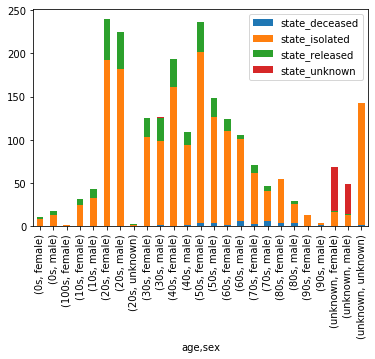

In [25]:
sk_detail_patient.groupby(['age', 'sex']).apply(lambda x: x.astype(int).sum()).plot.bar(stacked=True)

In [26]:
# use demographic data to find correlations

demo = pd.read_csv('./consolidated_data.csv')
demo

,index,Population,Density_(km2),Area_(km2),Migrants_(net),MedianAge,Urban_(%),WorldShare_(%),GDP_per_capita_PPP,GNI_per_capita_PPP,passengers_per_day,CountryID,Latitude,Longitude,Last_(Celsius),Previous_(Celsius),TempRecordDate
0,Afghanistan,38928346.0,60.0,652860.0,-62920.0,18.0,25.0,0.0050,1976.0,1970.0,5287.0,AF,33.939110,67.709953,2.88,7.73,Dec/15
1,Albania,2877797.0,105.0,27400.0,-14000.0,36.0,63.0,0.0004,12943.0,13350.0,415.0,AL,41.153332,20.168331,3.89,9.29,Dec/15
2,Algeria,43851044.0,18.0,2381740.0,-10000.0,29.0,73.0,0.0056,15293.0,14970.0,16194.0,DZ,28.033886,1.659626,13.35,18.21,Dec/15
3,Andorra,77265.0,164.0,470.0,NaN,NaN,88.0,0.0000,NaN,NaN,NaN,AD,42.546245,1.601554,7.08,9.76,Dec/15
4,Angola,32866272.0,26.0,1246700.0,6413.0,17.0,67.0,0.0042,6658.0,6170.0,3409.0,AO,-11.202692,17.873887,23.52,23.43,Dec/15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,"Venezuela, Bolivarian Republic of",28435940.0,32.0,882050.0,-653249.0,30.0,NaN,0.0036,NaN,17900.0,17690.0,VE,6.423750,-66.589730,26.52,26.96,Dec/15
192,Viet Nam,97338579.0,314.0,310070.0,-80000.0,32.0,38.0,0.0125,6790.0,6930.0,82040.0,VN,14.058324,108.277199,22.08,24.76,Dec/15
193,Yemen,29825964.0,56.0,527970.0,-30000.0,20.0,38.0,0.0038,2606.0,3800.0,3802.0,YE,15.552727,48.516388,20.15,22.22,Dec/15
194,Zambia,18383955.0,25.0,743390.0,-8000.0,18.0,45.0,0.0024,4033.0,4100.0,32.0,ZM,-13.133897,27.849332,25.21,25.41,Dec/15


In [27]:
# use 2020 freedom index from Freedom House

FH = pd.read_csv('./FreedomHouse2020.csv')
FH

,Country/Territory,Total
0,Abkhazia,40
1,Afghanistan,27
2,Albania,67
3,Algeria,34
4,Andorra,94
...,...,...
205,West Bank,25
206,Western Sahara,4
207,Yemen,11
208,Zambia,54


In [28]:
# recoveries_by_country.plot.bar(stacked=True)

In [29]:
sk_detail_timeAge = pd.read_csv('https://raw.githubusercontent.com/jihoo-kim/Data-Science-for-COVID-19/master/dataset/Time/TimeAge.csv')
sk_detail_timeAge = sk_detail_timeAge.tail(9)

In [30]:
sk_detail_timeAge.drop(['date', 'time'], axis=1, inplace=True)
sk_detail_timeAge.rename(columns={'age': 'Age Group', 'confirmed': 'SK Confirmed', 'deceased': 'SK Deaths'}, inplace=True)


In [31]:
sk_detail_timeAge.reset_index(drop=True)
sk_conf_death_by_age = sk_detail_timeAge.groupby(['Age Group']).apply(lambda x: x.astype(int).sum())
sk_conf_death_by_age

,SK Confirmed,SK Deaths
Age Group,,
0s,97,0
10s,452,0
20s,2365,0
30s,893,1
40s,1193,1
50s,1656,7
60s,1099,17
70s,568,35
80s,329,33


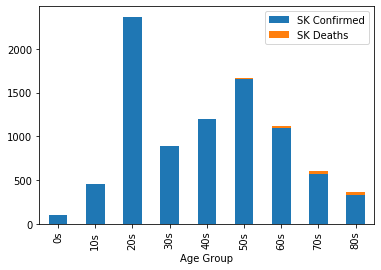

In [32]:
sk_detail_timeAge.groupby(['Age Group']).apply(lambda x: x.astype(int).sum()).plot.bar(stacked=True)

In [33]:
sk_conf_death_by_age['Mortality Rate'] = sk_conf_death_by_age['SK Deaths'] / sk_conf_death_by_age['SK Confirmed']
sk_conf_death_by_age['SK Confirmed'].sum()

8652

In [34]:
sk_conf_death_by_age

,SK Confirmed,SK Deaths,Mortality Rate
Age Group,,,
0s,97,0,0.000000
10s,452,0,0.000000
20s,2365,0,0.000000
30s,893,1,0.001120
40s,1193,1,0.000838
50s,1656,7,0.004227
60s,1099,17,0.015469
70s,568,35,0.061620
80s,329,33,0.100304


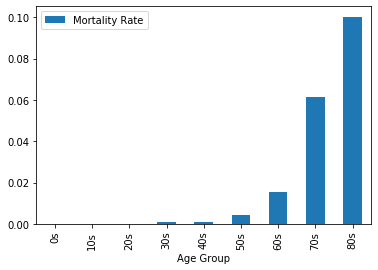

In [35]:
sk_mort = sk_conf_death_by_age.drop(['SK Deaths', 'SK Confirmed'], axis=1)
sk_mort.plot.bar()

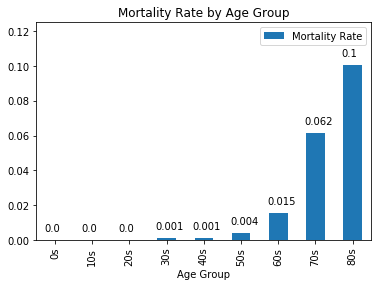

In [36]:
ax = sk_mort.plot(kind='bar', title='Mortality Rate by Age Group')
ax.set_ylim(0, 0.125)
for i, label in enumerate(list(sk_mort.index)):
    mr = sk_mort.loc[label]['Mortality Rate']
    ax.annotate(round(mr, 3), (i-.3, mr+.005))

In [37]:
sk_conf_by_age = sk_conf_death_by_age.drop(['SK Deaths', 'Mortality Rate'], axis=1)
sk_conf_by_age

,SK Confirmed
Age Group,
0s,97
10s,452
20s,2365
30s,893
40s,1193
50s,1656
60s,1099
70s,568
80s,329


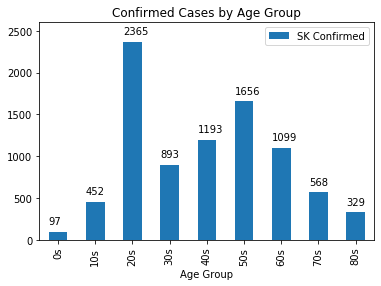

In [47]:
ay = sk_conf_by_age.plot(kind='bar', title='Confirmed Cases by Age Group')
ay.set_ylim(0, 2600)
for i, label in enumerate(list(sk_conf_by_age.index)):
    mr = sk_conf_by_age.loc[label]['SK Confirmed']
    ay.annotate(mr, (i-.25, mr+90))